<h3>1.</h3>


<h4>Background.</h4>

The Poisson distribution is a limiting case of the binomial distribution. The binomial distribution assigns a probability to the number of k successes in n trials where each trial has p likelihood of success and each trial is independent of all others. If we imagine these bins as arranged over an interval of time and increase the rate at which the bins are sampling the interval (increase the number of bins) to infinity we have the Poisson distribution. For the case of spikes it assigns a probability to the number of spikes counted within a time window assuming spikes arrive independently of each other at a constant rate.

Typically the Negative Binomial is thought of as a distribution that assign a probability to the number of k successes once r failures have occurred where each success has a likelihood of p. 
It just so happens that the negative binomial can also describe the likelihood of k events for a sum of Poissons where the Poisson's rates are distributed according to a Gamma distribution. Knowing that we can view k as the number of events within a given interval, k can also be thought of as spike counts. While the negative binomial is typically parameterized in terms of r (number failures before counting successes), and p (the probability of a success on each trial), we can equivalently parameterize it by it's mean and variance:

$$\mu=\frac{pr}{1-p},\ \ \sigma^2 = \frac{pr}{(1-p)^2}$$
rearrange these and voila:
$$r=\frac{\mu^2}{\sigma^2-\mu}, \ \ \ p = \frac{r}{r+\mu}$$
importantly
$$\sigma^2 = \mu + \frac{1}{r}\mu^2$$
So variance and sigma depend on each other but are scaled by $\frac{1}{r}$ and the mean is always less than the variance.

<h4>Two ways in which the Poisson and Negative Binomial distribution are more appropriate for modeling noisy spike counts then a Gaussian.</h4>
1. Spike counts are discrete. The Poisson and Negative Binomial are pmf i.e. discrete, the Gaussian is not, thus is inappropriate as it assigns non-zero probability to values a spike count could not take on.
2. Poisson and Negative Binomial assign a probability of 0 to all negative values this is appropriate for a spike count because spike counts cannot be negative. Gaussians on the other hand assigns a non-zero probabilitiy to negative numbers which a spike count could not take on.

<h4>One way in which the Negative Binomial Distribution is more appropriate then the Poisson distribution for modeling noisy spike counts.</h4>
1. For a Poisson distributed random variable $X$:
$$E(X) = Var(X)$$
This relationship does not hold generally, for spike counts (Tolhurst et al, 1981). Often spike counts variance will be greater than their mean. This is called over-dispersion.
Luckily as described earlier a negative binomial's variance is greater or equal to its mean and by scaling r different degrees of over-dispersion can be accounted for.

<h3>2A</h3>
Statistical hypothesis testing involves finding the probability of a test statistic (e.g. the difference between two means) under a null hypothesis (e.g. those two means came from the same distribution). One can then take their test statistic and calculate its likelihood under the null distribution, and they can then check whether it exceeds a pre-defined threshold for signifcance. This threshold will reflect the experimenters comfortable frequency of incorrectly rejecting the null hypothesis.

To build some intuition a one sample t-test askes whether we can reject the null hypothesis that the mean of our measurements is some value $\mu_0$ thus for the null hypothesis it assumes that the measurements $X_i$ are IID normal from the same distribution $N(\mu_0,\sigma^2)$.
Now if we sum up all these measurements the resulting random variable will be:
$$X = N(\mu_0, \frac{1}{n}\sigma^2)$$
This means that:
$$N(0, 1) = \frac{X-\mu_0}{\sigma/\sqrt{n}}$$
So if we knew $\sigma$ we would just evaluate the above equation and know exactly how far in standard deviations our measurement was from expectation under the null hypothesis and check whether it exceeded our criterion.
Unfortunately we do not know $\sigma$ and so estimate it from the data:
$$\hat{\sigma^2} = \frac{1}{n-1}\sum_i^n{(X_i-\bar{X})^2}$$
Plugging this estimate in
$$\frac{X-\mu_0}{\hat{\sigma}/\sqrt{n}}$$
this resulting random variable is not normally distributed but has whats called a t-distribution. A little wider owing to the variance of the estimate of the variance. This distribution is solely parameterized by the degrees of freedom, n-1, and importantly not on $\sigma$ or $\mu$ which are unknown

A two sample t-test asks whether we can reject the null hypothesis that the mean of measurements from two groups (same number of measurements) is the same. For the null hypothesis it assumes that the measurements drawn from each group are IID normal from the same distribution $N(\mu,\sigma^2)$. Again we do not know $\sigma$ but assuming it is equal across our two samples we estimate it by pooling it and in this case the statistic works out as:
$$t = \frac{\bar{X}_1-\bar{X}_2}{s_p \sqrt{2/n}}$$
$$$$
$$s_p = \sqrt{\frac{s^2_{X_1} + s^2_{X_2}}{2}}$$
$$s^2 = \frac{1}{n-1}\sum_i^n{(x_i-\bar{X})^2}$$

and under the null hypothesis this is a t-distribution with degrees of freedom 2(n-1).

Now to use the t-test all we have to do is calculate the t-statistic then look up the likelhood of that value on the t-distribution. We should keep in mind since our null hypothesis is that the means are the same, the sign of the mean difference does not matter for our p-value.

at p<.05 I reject the null hypothesis 0.044 percent of the time
at p<0.1 I reject the null hypothesis 0.105 percent of the time


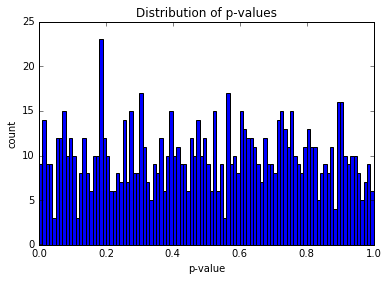

In [402]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline  
def mean_dif(x1, x2):
    return np.mean(x1)-np.mean(x2)
def pool_var(x1, x2):
    n=len(x1)
    pooled_var = (((np.var(x1, ddof=1) + np.var(x2, ddof=1))/2)**0.5)
    se = pooled_var*((2/n)**0.5)
    return se
def p_val_t(t, n):
    p = 2*(1-(stats.t.cdf(t, df=2*(n-1))))
    return p

# define a function for calculating the t-statistic
def t_stat(x1, x2):
    n=len(x1)
    mean_difed = mean_dif(x1, x2)
    pooled_var = pool_var(x1, x2)
    if mean_difed == 0:
        return  0
    elif pooled_var==0:
        return np.inf
    else:
        return mean_difed/pooled_var

def p_val_t(t, n):
    p = 2*(1-(stats.t.cdf(np.abs(t), df=2*(n-1))))
    return p

#set my parameters of the null distribution
n = 100
mu = 0
sd = 1
iters = 1000
p_list = []
for i in range(iters):
    #get my two samples from the null dist
    sample1 = np.random.normal(loc=mu, scale=sd, size=n)
    sample2 = np.random.normal(loc=mu, scale=sd, size=n)
    #calc t_stat
    t = t_stat(sample1, sample2)
    #look up its p-value
    p = p_val_t(t, n)
    #p = stats.ttest_ind(sample1, sample2, equal_var=True)[1]

    p_list.append(p)

p_vals = np.array(p_list)    
_ = plt.hist(p_vals, bins=100)
plt.xlabel('p-value')
plt.ylabel('count')
plt.title('Distribution of p-values')

print('at p<.05 I reject the null hypothesis '+ 
      str(sum(p_vals<.05)/iters) + ' percent of the time')
print('at p<0.1 I reject the null hypothesis '+
      str(sum(p_vals<.1)/iters) + ' percent of the time')

The distribution of p-values looks uniform, this makes sense because the odds of getting greater than any p-value should be that p-value.
Now lets look at if these results depend on n $\mu$ or $\sigma$ by turning the above example into a function, and plotting how often I reject the null hypothesis and show it doesn't vary much.

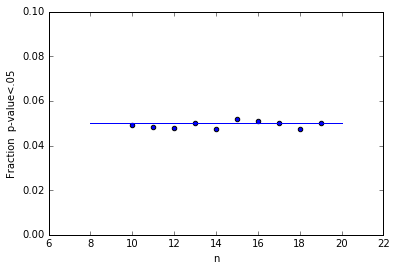

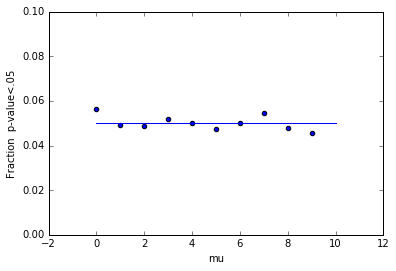

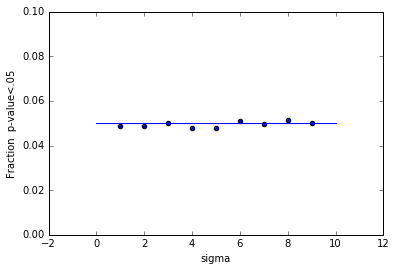

In [490]:
def t_test_iters(n, mu, sd, iters=1000):
    p_list = []
    for i in range(iters):
        #get my two samples from the null dist
        sample1 = np.random.normal(loc=mu, scale=sd, size=n)
        sample2 = np.random.normal(loc=mu, scale=sd, size=n)
        #calc t_stat
        t = t_stat(sample1, sample2)
        #look up its p-value
        p = p_val_t(t, n)
        p_list.append(p)
    return np.array(p_list)
plt.figure()
p_thresh = .05
iters = 10000
n=10
mu = 0
sd = 1
frac_sig = [sum(t_test_iters(n=n_s, mu=mu, sd=sd, iters=iters)<p_thresh)/iters
            for n_s in range(10,20)]
plt.scatter(range(10,20),frac_sig)
plt.xlabel('n')
plt.ylabel('Fraction  p-value<.05')
plt.ylim(0,0.1)
plt.plot([8,20], [0.05,0.05])

plt.figure()
frac_sig = [sum(t_test_iters(n=n, mu=mu_s, sd=sd, iters=iters)<p_thresh)/iters
            for mu_s in range(0,10)]
plt.scatter(range(0,10), frac_sig)
plt.xlabel('mu')
plt.ylabel('Fraction  p-value<.05')
plt.ylim(0,0.1)
plt.plot([0,10], [0.05,0.05])

plt.figure()
frac_sig = [sum(t_test_iters(n=n, mu=mu, sd=sd_s, iters=iters)<p_thresh)/iters
            for sd_s in range(1,10)]
plt.scatter(range(1,10), frac_sig)
plt.xlabel('sigma')
plt.ylabel('Fraction  p-value<.05')
plt.ylim(0,0.1)
plt.plot([0,10], [0.05,0.05])



As you can see above, changing any of the individual parameters does not systematically change the fraction of p-values less than 0.05.

<h3>2B</h3>
Going through the same excercise using a Poisson distribution.

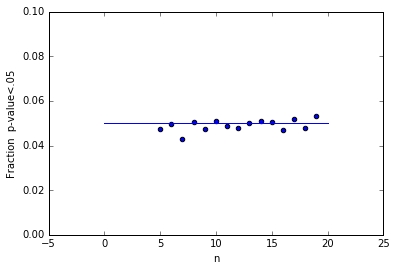

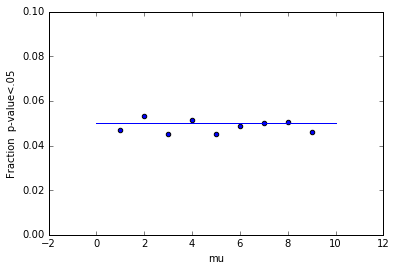

In [491]:
def t_test_iters(n, mu, iters=1000):
    p_list = []
    for i in range(iters):
        #get my two samples from the null dist
        sample1 = np.random.poisson(lam=mu, size=n)
        sample2 = np.random.poisson(lam=mu, size=n)        #calc t_stat
        t = t_stat(sample1, sample2)        #look up its p-value
        p = p_val_t(t,n)
        p_list.append(p)
    return np.array(p_list)

plt.figure()
p_thresh = .05
iters = 10000
n=5
mu = 1
frac_sig = [sum(t_test_iters(n=n_s, mu=mu, iters=iters)<p_thresh)/iters
            for n_s in range(5,20)]
plt.scatter(range(5,20),frac_sig)
plt.xlabel('n')
plt.ylabel('Fraction  p-value<.05')
plt.ylim(0,0.1)
plt.plot([0,20], [0.05,0.05])

plt.figure()
frac_sig = [sum(t_test_iters(n=n, mu=mu_s, iters=iters)<p_thresh)/iters
            for mu_s in range(1,10)]
plt.scatter(range(1,10), frac_sig)
plt.xlabel('mu')
plt.ylabel('Fraction  p-value<.05')
plt.ylim(0,0.1)
plt.plot([0,10], [0.05,0.05])


As you can see above, changing any of the individual parameters for Poissons does not systematically change the fraction of p-values less than 0.05.

In [ ]:
frac_sig = [sum(t_test_iters(n=n_s, mu=mu, iters=iters)<p_thresh)/iters
            for n_s in range(5,20)]
plt.scatter(range(5,20),frac_sig)
plt.xlabel('n')
plt.ylabel('Fraction  p-value<.05')
plt.ylim(0,0.1)

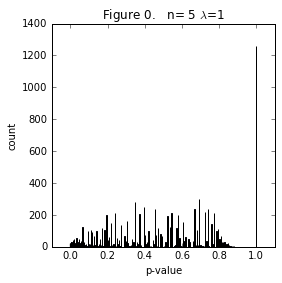

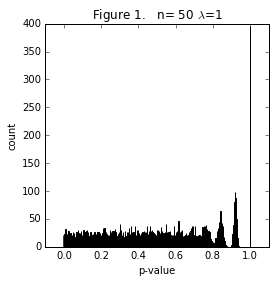

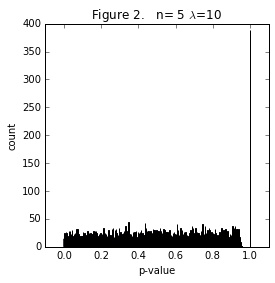

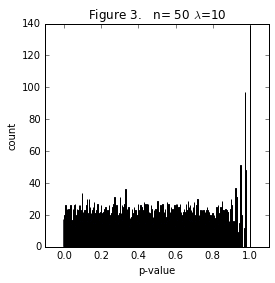

In [461]:
#set my parameters of the null distribution
iters = 10000
n_s = [5,50,5,50]
mu_s = [1,1, 10,10,]

for mu, n, i in zip(mu_s, n_s, range(len(n_s))):

    plt.figure(figsize=(4,4))
    p_vals = t_test_iters(n=n, mu=mu, iters=iters) 
    _ = plt.hist(p_vals, bins=500)
    plt.xlabel('p-value')
    plt.ylabel('count')
    plt.title('Figure '+str(i) +'.   n= '+ str(n) +' $\lambda$='+str(mu))
    plt.xlim(-0.1, 1.1)

Before we dive into the results lets build up a frame for understanding them and consider the statistic we are calculating:
$$t = \frac{\bar{X}_1-\bar{X}_2}{s_p \sqrt{2/n}}$$

The Numerator:

For $\bar{X} = \frac{1}{n}\sum_i^n{x_i}$ we know that $Poiss(n\lambda) = \sum_i^n{x_i}$ since a sum of Poissons is a Poisson except with a summation of the means. So $\bar{X} = \frac{1}{n}Poiss(n\lambda)$ which is a Poisson PMF on $\frac{i}{n}$ where $i \in Z$. The joint distribution of two of these is a grid and the distribution of the difference of these two $\bar{X}_1-\bar{X}_2$ simply involves summing down onto the axis perpendicular to the line of unity which with a little basic geometry will make the spacing between points on this symetrical PMF equal to $\frac{1}{2} \sqrt{\frac{1}{n}^2 + \frac{1}{n}^2} = \frac{\sqrt{2}}{2n}$.

The Denominator:

In expection we know that $E(s_p) = \sqrt{\lambda}$ the standard deviation of our Poisson. So the denominator on average will be $\sqrt{\lambda  2/n}$ thus in expecation the spacing between discrete t-values will be
$$\frac{\sqrt{2}}{2n\sqrt{\lambda \frac{2}{n}}}$$

so this basically says with increases in either $\lambda$ or $n$, though mostly $n$, we can expect the pmf of the expected t-values to decrease their intervals between each other.

one other factor that will effect the spacing between t-values and their distribution around these discrete intervals is the variance of our estimate of the $s_p$
$Var(s_p^2) = \frac{2\lambda^2}{(n-1) + (\lambda / n)}$ 
which is basically just saying for the same $\lambda$ increases in $n$ will drive down the variance, and for the same $n$ increases in $\lambda$ will drive up variance of this estimate. This variance will jitter exactly where the discrete differences in the means end up as t-values around their expected spacing derived above.

Figure 0.)

We see a peak at a p-value of one, and a fair amount of space around it. In addition the distribution is quite spiky. Both of these effects are the result of the discrete nature of the Poisson distribution.

As described above the joint distribution of the two identical poissons will be an integer grid of probabilities that is symmetrical about the line of unity, and non-zero probabilities are only in the upper right quadrant of the plane (only positive outcomes). When the Poissons have a low $\lambda$ they are skewed towards 0, and the joint distribution gets packed into the positive corner near the origin, whereas when $\lambda$ is high the distributions become more normal and probability disperses away from the origin. 

It is events that lie along the unity line that result in a mean difference of 0, which result in a p-value of 1. As $\lambda$ increases more and more probability ends up on the unity line as we get packed towards the origin, in the extreme of 1 trial $\lambda=1$ the majority of probability is equally distributed between the outcome $(x_1=1, \ x_2=1), \ (x_1=0, \ x_2=1),(x_1=1, \ x_2=0) \ ,(x_1=0, \ x_2=0)$. If we make a marginal perpendicular to the unity line this describes the probability of differences of the two Poissons, with the probability at the origin reflecting the likelihood of a mean difference of 0. 

Comparing Figure 0.) and 2.) we see the peak at 0 drops down after an increase in $\lambda$ consistent with this idea.

Fig 1.)

Here I've increased n by a factor of 10 and we see the gap betwen the peak at one and the next peak has narrowed consistent with n decreasing the spacing between sums. In addition the peak at one has shortened consistent with n increasing the effective lambda and dispersing the joint distribution off the line of unity. The reason why the peak at 1 does not suffer this jitter is that with a 0 in the numerator, changes in variance won't change the t-value $0/x=0$

Fig 2.)

Here I've increase $\lambda$ by a factor of 10 and we see the peaks go away this is because with high lambda we increase the variance of our variance estimate hence adding alot of jitter, and there isn't a high n to compensate. The gap between 1 and the next signifcant values is smaller than in Fig.0 presumably because of this increased jitter and increased $\lambda$.

Fig 3.)

Increasing both $\lambda$ and $n$ by a factor of 10 both decreases the spacing more than any other examples, while maintaining a tight distribution around these peaks. In addition it further brings down the peak at 0 because of the increased effective $\lambda$

Now lets double check these intuitions by simulating the steps involved in calculating the t-value.

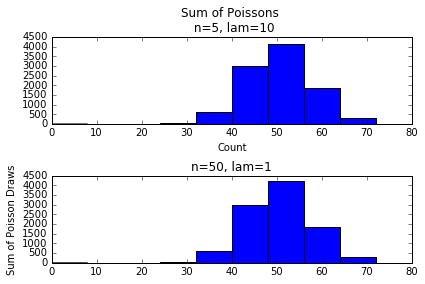

In [481]:
a = np.random.poisson(lam=1,size=(5, 10000, 2))
b = np.random.poisson(lam=1,size=(50, 10000, 2))
plt.subplot(211)
plt.hist(np.sum(a,0)[...,0], range=(0,80))
plt.title('Sum of Poissons \n n=5, lam=10')
plt.xlabel('Count')

plt.subplot(212)
plt.hist(np.sum(b,0)[...,0], range=(0,80))
plt.title('n=50, lam=1')
plt.ylabel('Sum of Poisson Draws')

plt.tight_layout()

As expected the marginals before calculating the t-stat are the same. Now lets look at the mean difference.

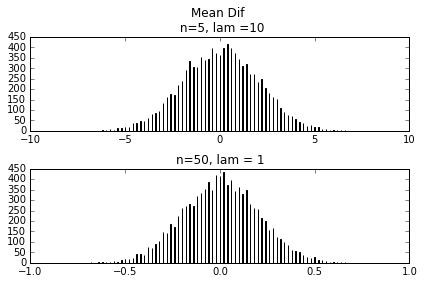

In [482]:
mu_a = np.mean(a,0)
mu_b = np.mean(b,0)
mu_dif_a = mu_a[...,0] - mu_a[...,1]
mu_dif_b = mu_b[...,0] - mu_b[...,1]
plt.subplot(211)
plt.hist((mu_dif_a), range=(-10,10),bins=1001, normed=False)
plt.title('Mean Dif \n n=5, lam =10')

plt.subplot(212)
plt.hist((mu_dif_b), range=(-1,1), bins=1001, normed=False)
plt.title('n=50, lam = 1')
plt.tight_layout()

We see the mean difference gets compresed in the case of n=50, with a roughly 10-fold decrease in spacing but about the same distribution.

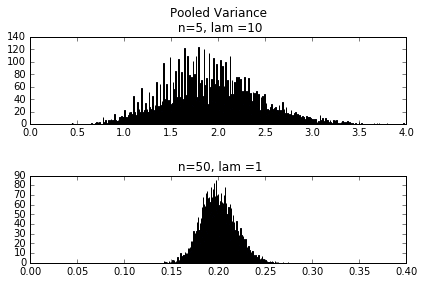

In [483]:
#For clarity in the code I write out the pooled SE explicitly 
#but all it amounts to is just a calculation of SE across all samples 
#(we assumed equal variance and so we go for the best estimate possible).

n = 5.
pooled_var = (((np.var(a[...,1], 0, ddof=1) + np.var(a[...,0], 0,ddof=1))/2)**0.5)
a_se = pooled_var*((2/n)**0.5)

n = 50.
pooled_var = (((np.var(b[...,1], 0, ddof=1) + np.var(b[...,0], 0,ddof=1))/2)**0.5)
b_se = pooled_var*((2/n)**0.5)

plt.subplot(211);plt.title('Pooled Variance' +'\n n=5, lam =10')
plt.hist(a_se, bins=500, normed=False);plt.xlim(0,4)

plt.subplot(212);plt.title('\n n=50, lam =1')
plt.hist(b_se, bins=500, normed=False);plt.xlim(0,.4)
plt.tight_layout()

So while in the mean difference case our distribution only got contracted by a factor of 10, in the variance case while the expected variance only got scaled by this amount, the distribution was scaled by alot more. This is because with higher n our the variance of our variance estimate goes down.
How is this going to effect our t-stat? Lets look at the joint distribution of mean and pooled variance before we divide mean by variance:

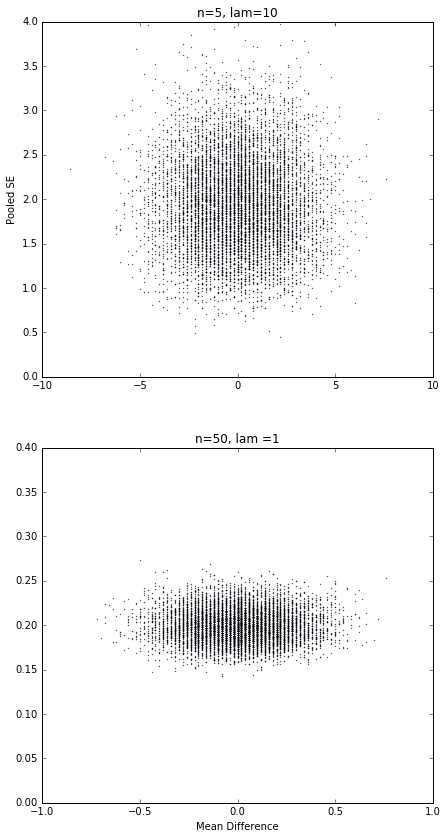

In [489]:
plt.figure(figsize=(7,14))
plt.subplot(211)
plt.scatter(mu_dif_a, a_se,s=.1);plt.xlim(-10,10);plt.ylim(0,4)
plt.title('n=5, lam=10')
plt.ylabel('Pooled SE')
plt.subplot(212)
plt.scatter(mu_dif_b, b_se,s=.1);plt.xlim(-1,1);plt.ylim(0,.4)
plt.title('n=50, lam =1');plt.xlabel('Mean Difference')


Here I've scaled the two axes so that ratios will end up being the same according to position in pixels in either plot. 
The mean difference and variance first of all appear to be independent in both.

The main difference is that while the mean difference  is scaled between the two the variance along the pooled SE axis is reduced in the case of n=50.  With increased SE variance we can expect the t-stat to be jittered more and hence reduce influence of discretisation. Each mean difference value has a host of indepdent SE denominators that will shift the ratio of the two (t-stat) around. 
We see this below when plotting t-values:

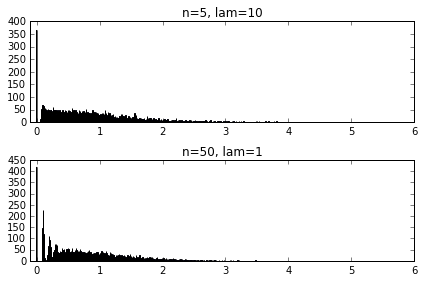

In [492]:
t_a = mu_dif_a/a_se; t_b = mu_dif_b/b_se
plt.subplot(211)
plt.title('n=5, lam=10')
plt.hist(np.abs(t_a), bins=1000, normed=False, range=(0,6))
plt.xlim(-0.1,6)
plt.subplot(212)
plt.title('n=50, lam=1')
plt.hist(np.abs(t_b), bins=1000, normed=False, range=(0,6))
plt.xlim(-0.1,6)

plt.tight_layout()

Here we see the predicted effect, the zero difference peak is in the same place and the same magnitude as it is not effected by changes in variance $(0/x=0)$. But adjacent to that signs of discretization are clearer for $n=50$, as the variance in the SE is low and so does not jitter the discretization found in the mean difference as much and it shows up in the t-statistic distribution.

Now the final transformation the p-value.

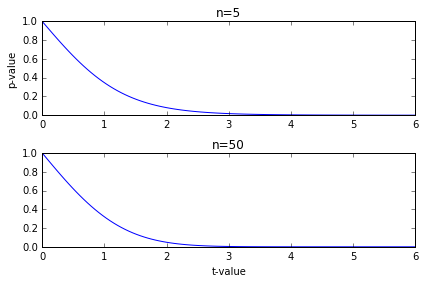

In [495]:
n = 5
t = list(np.linspace(0,6,100))

p = 2*(1-(stats.t.cdf(t, df=2*(n-1))))
plt.subplot(211)
plt.plot(t, p)
plt.ylabel('p-value')
plt.title('n=' +str(n))

n=50
p = 2*(1-(stats.t.cdf(t, df=2*(n-1))))
plt.subplot(212)
plt.title('n=' +str(n))
plt.plot(t, p)
plt.xlabel('t-value')

plt.tight_layout()

The influence of different n isn't huge. This final transformation will leave the distance between low t-values similar, so we will still be able to see the effects of discretisation but for high t-values they will all get piled next to each other.

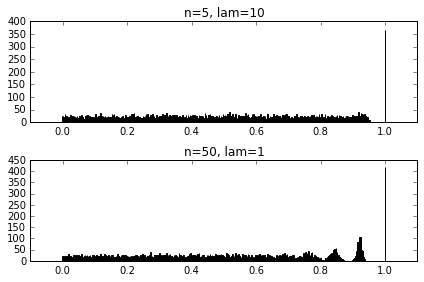

In [494]:
n=5
p = p_val_t(t_a, n)
plt.subplot(211)
_=plt.hist(p, bins=500)
plt.xlim(-0.1, 1.1)
plt.title('n=5, lam=10')

n=50
p = p_val_t(t_b, n)
plt.subplot(212)
_=plt.hist(p, bins=500)
plt.xlim(-0.1, 1.1)
plt.title('n=50, lam=1')
plt.tight_layout()

<h3>3.</h3>
Lets start by defining our three test statistics (first two from you, last one from me.)

In [496]:
def test_stat1(x,lam0,lam1):
    return (np.mean(x)-lam0)/(lam1-lam0)

def test_stat2(x,lam0,lam1):
    log_alt_prob = np.sum(np.log(stats.poisson.pmf(x, mu=lam1)))
    log_null_prob = np.sum(np.log(stats.poisson.pmf(x, mu=lam0)))
    return log_alt_prob-log_null_prob

def test_stat3(x,lam0,lam1):
    return (np.median(x)-lam0)/(lam1-lam0)

In [497]:
# now lets figure out the cut off of.
lam1 = 7
lam0 = 6
n = 6

x=np.random.poisson(lam=lam0, size=(10000,n))
test_stat1_dist = np.array([test_stat1(samp, lam0, lam1) for samp in x])
stat1_crit = np.percentile(test_stat1_dist,95)

test_stat2_dist = np.array([test_stat2(samp, lam0, lam1) for samp in x])
stat2_crit = np.percentile(test_stat2_dist,95)

test_stat3_dist = np.array([test_stat3(samp, lam0, lam1) for samp in x])
stat3_crit = np.percentile(test_stat3_dist,95)

print('stat1 cut-off = '+str(stat1_crit))
print('stat2 cut-off = '+str(stat2_crit))
print('sta3 cut-off = '+str(stat3_crit))

stat1 cut-off = 1.66666666667
stat2 cut-off = 1.09093127205
sta3 cut-off = 2.0


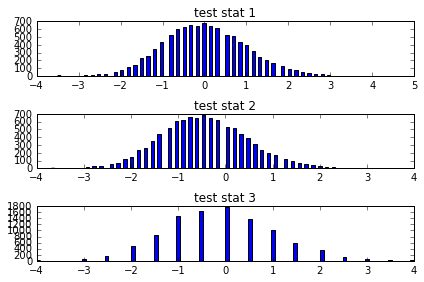

In [498]:
plt.subplot(311)
_=plt.hist(test_stat1_dist,  bins=100)
plt.title('test stat 1')

plt.subplot(312)
_ = plt.hist(test_stat2_dist, bins=100)
plt.title('test stat 2')

plt.subplot(313)
_ = plt.hist(test_stat3_dist, bins=100)
plt.title('test stat 3')
plt.tight_layout()

In [499]:
iters = 10000.
x=np.random.poisson(lam=lam1, size=(iters,n))

test_stat1_dist = np.array([test_stat1(samp, lam0, lam1) for samp in x])
rej_null_prop_stat1 = np.sum(test_stat1_dist>stat1_crit)/iters

test_stat2_dist = np.array([test_stat2(samp, lam0, lam1) for samp in x])
rej_null_prop_stat2 = np.sum(test_stat2_dist>stat2_crit)/iters

test_stat3_dist = np.array([test_stat3(samp, lam0, lam1) for samp in x])
rej_null_prop_stat3 = np.sum(test_stat3_dist>stat3_crit)/iters



/Users/deanpospisil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [500]:
print('stat1 correctly rejects the null hypothesis ' + 
      str(rej_null_prop_stat1*100)+'% of the time')
print('stat2 correctly rejects the null hypothesis ' + 
      str(rej_null_prop_stat2*100)+'% of the time')
print('stat3 correctly rejects the null hypothesis ' + 
      str(rej_null_prop_stat3*100)+'% of the time')

stat1 correctly rejects the null hypothesis 23.39% of the time
stat2 correctly rejects the null hypothesis 24.58% of the time
stat3 correctly rejects the null hypothesis 12.61% of the time


It would seem stat2 is the most powerful, I believe it is a max-likelihood estimator? Thus nothing could beat it? stat3 was a modification of Stat1 where instead of using the mean I use the median a less biased estimatator in the presence of skew. This did not help, presumably the mean preserved important gradations that the median did not. Notice how the distribution of stat1 vs stat3 are respectively well sampled and sparsely sampled.